***Problem 1.2**

Attributions: All three of us discussed how best to write the code and plot the functions for (a), (b), and (c). Michelle typed up the draft version of the code and Elena edited it for style, LaTeX, and accuracy. Elena wrote up the discussion in this Jupyter notebook.

In [5]:
# Import needed modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

<b>a)</b> First, since we are asked to plot the function for a few sets of parameter values, we set up a NumPy array, fitparam1, containing three arrays, each of which is a different set of parameter values. (We noticed later on that the plots are easier to display appropriately on the same axes if the three values of $\lambda$ are similar to each other, since $\lambda$ controls the speed of the decay and hence how sharp the bend in the curve is.)

In [16]:
# Set up an array of arrays containing three different example sets of 
# parameters for our function

# In each three-element array, the 0th element is a, the 1st element is 
# b, and the 2nd element is lambda

fitparam1 = np.array([[0, 2, 2], [10, 2, 1.5], [20, 3, 1]])

We then wrote $y = a + b\mathrm{e}^{-x/\lambda}$ as a Python function of the form f(p, x), where p is a NumPy array containing the fit parameters. We plotted the function for our three example sets of parameters. We chose to plot on a linear rather than logarithmic or semilogarithmic scale because plotting on a log scale would only yield a linear plot if $a = 0$.

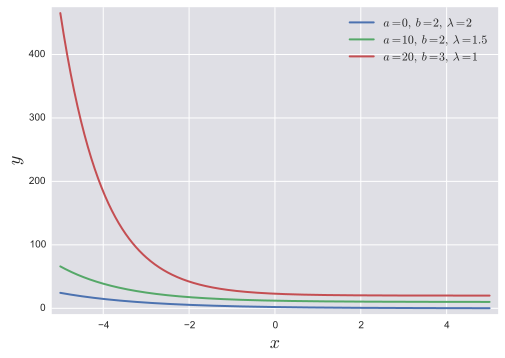

In [17]:
def exponent_func(p, x):
    '''
    return exponent decay with background signal
    '''
    a, b, L = p

    return a + b * np.exp(-x / L)

# Make a set of evenly spaced points in x
x = np.linspace(-5.0, 5.0, 500)

# Compute y for each of our three example sets of parameters
y1 = exponent_func(fitparam1[0], x)
y2 = exponent_func(fitparam1[1], x)
y3 = exponent_func(fitparam1[2], x)

# Make smooth plots
plt.plot(x, y1, '-')
plt.plot(x, y2, '-')
plt.plot(x, y3, '-')
plt.margins(x = 0.02, y = 0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Add a legend (must update if the parameter values are changed)
plt.legend((r'$a = 0, \, b = 2, \, \lambda = 2$', 
r'$a = 10, \,b = 2, \, \lambda = 1.5$', 
r'$a = 20, \, b = 3, \, \lambda = 1$'), loc='upper right',
prop={"size":12})


<b>b)</b> We approached (b) in the same way as (a). We first set up an array, fitparam2, of three different sets of parameter values. We then wrote the Cauchy distribution, $y = \frac{\beta}{\pi\,(\beta^{2}\, + \,(x \, - \, \alpha)^{2})}$, as a Python function, again of the form f(p, x) where p is a NumPy array containing the fit parameters. We plotted the function for our three sets of example parameter values. We chose a linear scale because it gave reasonable-looking plots with values that were neither clustered too tightly nor spread out over a huge range.  

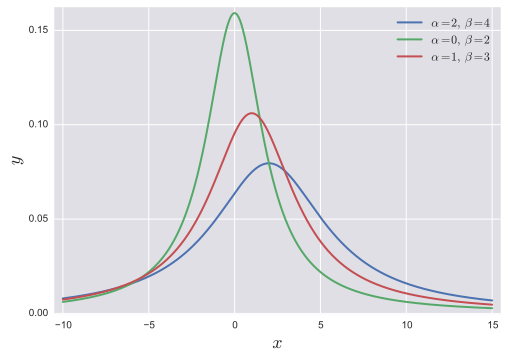

In [18]:
fitparam2 = np.array([[2, 4], [0, 2], [1, 3]])

def cauchy_distr(p, x):
    '''
    return cauchy distribution
    '''
    a, b = p

    return b / (np.pi * (b**2 + (x - a)**2))

x = np.linspace(-10, 15, 1000)

y1 = cauchy_distr(fitparam2[0], x)
y2 = cauchy_distr(fitparam2[1], x)
y3 = cauchy_distr(fitparam2[2], x)

plt.plot(x, y1, '-')
plt.plot(x, y2, '-')
plt.plot(x, y3, '-')
plt.margins(x = 0.02, y = 0.02)
plt.xlabel(r'$x$')
plt.ylabel(r"$y$")
plt.legend((r'$\alpha = 2, \, \beta = 4$', r'$\alpha = 0, \, \beta = 2$', 
r'$\alpha = 1, \, \beta = 3$'), loc='upper right',prop={"size":12})

<b>c)</b> For (c), we again set up an array, fitparam23, of three different sets of parameter values. We wrote the Hill function, $y = \frac{x^{\alpha}}{k^{\alpha} \, + \, x^{\alpha}}$, as a Python function, again of the form f(p, x) where p is a NumPy array containing the fit parameters. At first we plotted the function on a linear scale. 

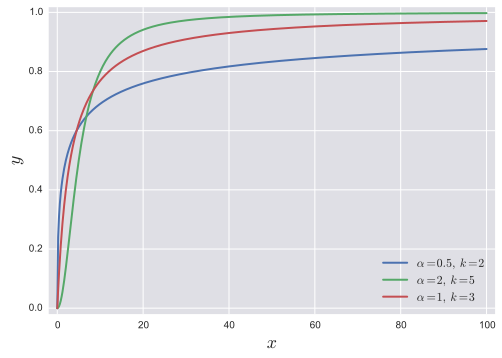

In [21]:
fitparam3 = np.array([[0.5, 2], [2, 5], [1, 3]])

def hill_func(p, x):
    '''
    Return Hill Function
    '''
    a, k = p

    return x**a / (k**a +x**a)

x = np.linspace(0, 100, 500)

y1 = hill_func(fitparam3[0], x)
y2 = hill_func(fitparam3[1], x)
y3 = hill_func(fitparam3[2], x)

plt.plot(x, y1, '-')
plt.plot(x, y2, '-')
plt.plot(x, y3, '-')

plt.margins(x = 0.02, y = 0.02)
plt.xlabel(r'$x$')
plt.ylabel(r"$y$")
plt.legend((r'$\alpha = 0.5, \, k = 2$', r'$\alpha = 2, \, k = 5$', 
            r'$\alpha = 1, \, k = 3$'), loc='lower right',prop={"size":12})


We then decided instead to plot the function on a semilogarithmic scale (logarithmically scaled x axis), because the function rapidly increases before levelling out, resembling a hyperbolic growth curve. (Incidentally, the shape of this function makes perfect sense as it is used to describe what fraction of macromolecule is bound to ligand as a function of ligand concentration;$^1$ the function levels out as the macromolecule becomes saturated.) Plotting on a semilogx scale makes it easier to see what is happening when x is small, and also transforms the function to resemble the logistic function (sigmoidal shape). For these reasons, we prefer the plot on a semilogx scale over the plot on a linear scale.

$^1$ Source: https://en.wikipedia.org/wiki/Hill_equation_%28biochemistry%29

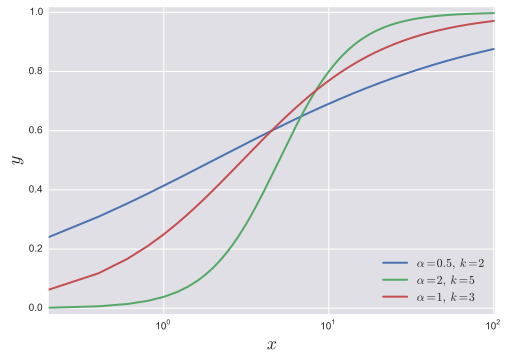

In [22]:
plt.semilogx(x, y1, '-')
plt.semilogx(x, y2, '-')
plt.semilogx(x, y3, '-')

plt.margins(x = 0.02, y = 0.02)
plt.xlabel(r'$x$')
plt.ylabel(r"$y$")
plt.legend((r'$\alpha = 0.5, \, k = 2$', r'$\alpha = 2, \, k = 5$', 
            r'$\alpha = 1, \, k = 3$'), loc='lower right',prop={"size":12})